## Neural Network

**Visualizing the difference in distribution between diabetics and non-diabetics with separate plots using seaborn. Creating a subplot of 3 X 3 and plotting a density plot for each variable.**

In [1]:
import pandas as pd
df = pd.read_csv('diabetes2.csv')

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
from matplotlib import pyplot as plt 

df.hist(figsize=(15, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C9A68BE940>,
      dtype=object)

D:\Python\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Python\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
D:\Python\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


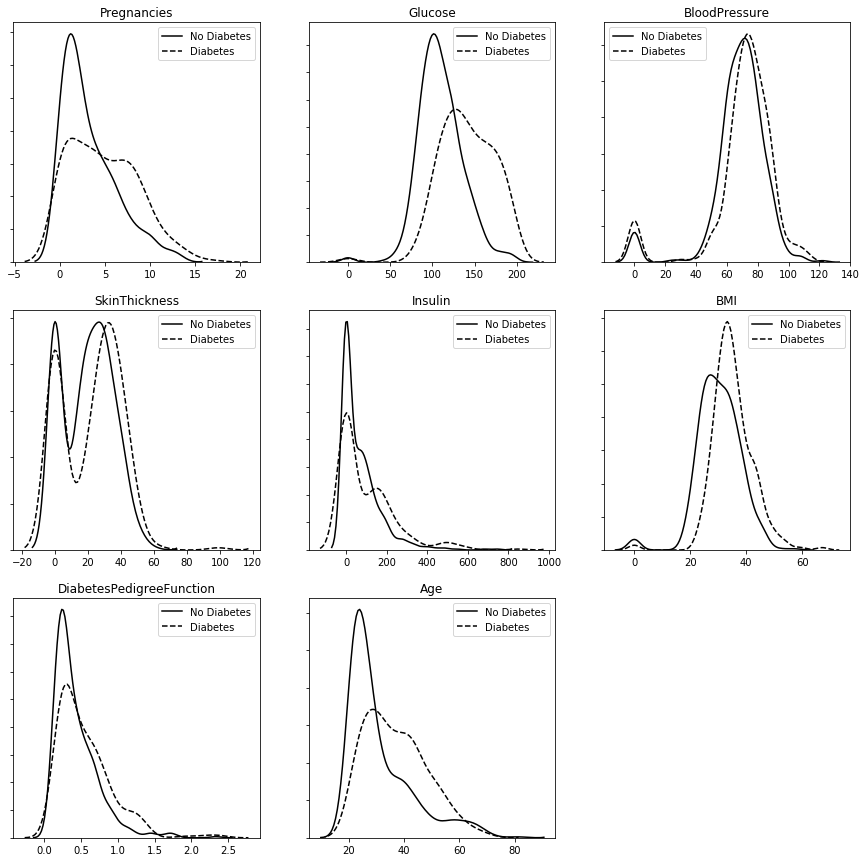

In [4]:
import seaborn as sns

# creating a subplot of 3 x 3
plt.subplots(3,3,figsize=(15,15))

# Plot a density plot for each variable
for idx, col in enumerate(df.columns):
    ax = plt.subplot(3,3,idx+1)
    ax.yaxis.set_ticklabels([])
    sns.distplot(df.loc[df.Outcome == 0][col], hist=False, axlabel= False, 
    kde_kws={'linestyle':'-',  
    'color':'black', 'label':'No Diabetes'})
    sns.distplot(df.loc[df.Outcome == 1][col], hist=False, axlabel= False, 
    kde_kws={'linestyle':'--', 
    'color':'black', 'label':'Diabetes'})
    ax.set_title(col)

# Hiding the 9th subplot (bottom right)
plt.subplot(3,3,9).set_visible(False)

plt.show()

**Checking the data (null data and number of rows with 0 for each variable). <br>
Replacing the zero values with NaN.<br>
Replacing the NaN values with the mean of the non-missing values**

In [5]:
print('Number of rows with 0 values for each variable')
for col in df.columns:
    missing_rows = df.loc[df[col]==0].shape[0]
    print(col + ': ' + str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [6]:
import numpy as np

df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [8]:
print('Number of rows with 0 values for each variable')
for col in df.columns:
    missing_rows = df.loc[df[col]==0].shape[0]
    print(col + ': ' + str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


Not editing the 'Pregnancies' column as having a 0 value is valid.

In [9]:
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


**Standardizing the data.**

In [11]:
from sklearn import preprocessing

In [12]:
df_scaled = preprocessing.scale(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [13]:
df_scaled['Outcome'] = df['Outcome']
df = df_scaled

In [14]:
df.describe().loc[['mean', 'std','max'],].round(2).abs()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.35
std,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,0.48
max,3.91,2.54,4.1,7.95,8.13,5.04,5.88,4.06,1.00


**Creating a train and test set (80/20).**

In [15]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'Outcome']
y = df.loc[:, 'Outcome']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Using the sequential class from Keras to build the MLP. Adding two hidden layers (with the respective node values of 32 and 16, ‘relu’ activation) and one hidden layer (‘sigmoid’ activation for output layer). Using ‘adam’ optimizer and ‘binary crossentropy’ loss.**

In [17]:
from keras.models import Sequential
model = Sequential()

Using TensorFlow backend.


In [18]:
from keras.layers import Dense
# Add the first hidden layer
model.add(Dense(32, activation='relu', input_dim=8))

In [19]:
# Add the second hidden layer
model.add(Dense(16, activation='relu'))

In [20]:
# Add the output layer
model.add(Dense(1, activation='sigmoid'))

In [21]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Cross-entropy is a measure from the field of information theory, building upon entropy and generally calculating the difference between two probability distributions

**Checking if the outcome of 100 and 200 epochs is same.**

In [22]:
# Train the model for 100 epochs
model.fit(X_train, y_train, epochs=100)


Epoch 1/100
614/614 [==============================] - 1s 1ms/step - loss: 0.7159 - accuracy: 0.5309
Epoch 2/100
614/614 [==============================] - 0s 60us/step - loss: 0.6505 - accuracy: 0.6629
Epoch 3/100
614/614 [==============================] - 0s 87us/step - loss: 0.5976 - accuracy: 0.6759
Epoch 4/100
614/614 [==============================] - 0s 113us/step - loss: 0.5500 - accuracy: 0.7182
Epoch 5/100
614/614 [==============================] - 0s 70us/step - loss: 0.5103 - accuracy: 0.7606
Epoch 6/100
614/614 [==============================] - 0s 78us/step - loss: 0.4846 - accuracy: 0.7752
Epoch 7/100
614/614 [==============================] - 0s 81us/step - loss: 0.4675 - accuracy: 0.7818
Epoch 8/100
614/614 [==============================] - 0s 60us/step - loss: 0.4546 - accuracy: 0.7834
Epoch 9/100
614/614 [==============================] - 0s 65us/step - loss: 0.4447 - accuracy: 0.7834
Epoch 10/100
614/614 [==============================] - 0s 58us/step - loss: 0.43

In [23]:
scores = model.evaluate(X_train, y_train)
print('Training Accuracy: %.2f%%\n' % (scores[1]*100))

scores = model.evaluate(X_test, y_test)
print('Testing Accuracy: %.2f%%\n' % (scores[1]*100))

614/614 [==============================] - 0s 120us/step
Training Accuracy: 85.99%

154/154 [==============================] - 0s 32us/step
Testing Accuracy: 74.03%



In [24]:
# Train the model for 200 epochs
model.fit(X_train, y_train, epochs=200)

Epoch 1/200
614/614 [==============================] - 0s 78us/step - loss: 0.3129 - accuracy: 0.8550
Epoch 2/200
614/614 [==============================] - 0s 67us/step - loss: 0.3114 - accuracy: 0.8583
Epoch 3/200
614/614 [==============================] - 0s 73us/step - loss: 0.3138 - accuracy: 0.8469
Epoch 4/200
614/614 [==============================] - 0s 63us/step - loss: 0.3112 - accuracy: 0.8534
Epoch 5/200
614/614 [==============================] - 0s 70us/step - loss: 0.3088 - accuracy: 0.8485
Epoch 6/200
614/614 [==============================] - 0s 65us/step - loss: 0.3092 - accuracy: 0.8502
Epoch 7/200
614/614 [==============================] - 0s 68us/step - loss: 0.3090 - accuracy: 0.8453
Epoch 8/200
614/614 [==============================] - 0s 65us/step - loss: 0.3088 - accuracy: 0.8550
Epoch 9/200
614/614 [==============================] - 0s 73us/step - loss: 0.3058 - accuracy: 0.8550
Epoch 10/200
614/614 [==============================] - 0s 63us/step - loss: 0.304

614/614 [==============================] - 0s 60us/step - loss: 0.1678 - accuracy: 0.9463
Epoch 160/200
614/614 [==============================] - 0s 57us/step - loss: 0.1643 - accuracy: 0.9511
Epoch 161/200
614/614 [==============================] - 0s 60us/step - loss: 0.1642 - accuracy: 0.9381
Epoch 162/200
614/614 [==============================] - 0s 57us/step - loss: 0.1613 - accuracy: 0.9511
Epoch 163/200
614/614 [==============================] - 0s 55us/step - loss: 0.1596 - accuracy: 0.9528
Epoch 164/200
614/614 [==============================] - 0s 57us/step - loss: 0.1589 - accuracy: 0.9511
Epoch 165/200
614/614 [==============================] - 0s 54us/step - loss: 0.1592 - accuracy: 0.9446
Epoch 166/200
614/614 [==============================] - 0s 58us/step - loss: 0.1588 - accuracy: 0.9414
Epoch 167/200
614/614 [==============================] - 0s 57us/step - loss: 0.1588 - accuracy: 0.9528
Epoch 168/200
614/614 [==============================] - 0s 62us/step - loss: 

In [25]:
scores = model.evaluate(X_train, y_train)
print('Training Accuracy: %.2f%%\n' % (scores[1]*100))

scores = model.evaluate(X_test, y_test)
print('Testing Accuracy: %.2f%%\n' % (scores[1]*100))

614/614 [==============================] - 0s 39us/step
Training Accuracy: 96.42%

154/154 [==============================] - 0s 45us/step
Testing Accuracy: 70.13%



 **Evaluating the training and testing sets’ accuracy.**

The models which are trained more, have more training and testing accuracy. For the model which is trained with 100 epochs, it has a training and testing accuracy of 85.99% and 74.03%, while with 200 epochs, the training and testing accuracies are 96.42% and 70.13%. The training and testing accuracies are almost same, which means the number of Epoch does not play a important role.

**Provide the confusion matrix using seaborn. What are the conclusions**?

Text(33.0, 0.5, 'Actual')

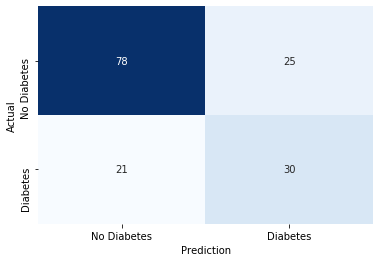

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_test_pred = model.predict_classes(X_test)
c_matrix = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot=True, 
                 xticklabels=['No Diabetes','Diabetes'],
                 yticklabels=['No Diabetes','Diabetes'], 
                 cbar=False, cmap='Blues')
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')

From the confusion matrix, you can say that most of the predictions are true positives(30) and true negatives(82), can be cross varified from the test accuracy too(~73%).

**Providing the ROC graph. What are the conclusions?**

In [27]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_test_pred_probs = model.predict(X_test)

In [28]:
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)

Text(0, 0.5, 'True Positive Rate')

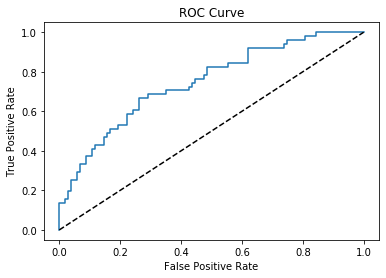

In [29]:
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') #diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

The Area Under the Curve (AUC) evaluates the performance of the model that produced the curve.

A large AUC indicates that the model is able to differentiate the respective classes with high accuracy, while a low AUC indicates that the model makes poor, often wrong predictions. A ROC curve that lies on the diagonal indicates that the model does no better than random.

From the graph, we can say that the trained model is performing well as it is able to differentiate samples of different classes and making good predictions.